In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
%matplotlib inline
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential

import matplotlib


In [244]:
sd=pd.read_csv("NREL_data.csv")

In [245]:
sd.head(10)

,Year,Month,Day,Hour,Minute,DHI,DNI,Dew Point,Temperature,Pressure,Wind Speed
0,2012,1,1,0,30,0,0,20,21.449194,974,2
1,2012,1,1,1,30,0,0,19,21.174410,973,2
2,2012,1,1,2,30,0,0,19,20.841860,973,2
3,2012,1,1,3,30,0,0,19,20.361494,973,2
4,2012,1,1,4,30,0,0,19,19.889306,973,2
5,2012,1,1,5,30,0,0,20,21.193089,976,2
6,2012,1,1,6,30,0,0,20,21.183199,977,2
7,2012,1,1,7,30,50,0,21,21.635665,978,2
8,2012,1,1,8,30,125,0,21,22.467974,978,2
9,2012,1,1,9,30,177,2,21,23.750316,978,2


In [246]:
sd.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'DHI', 'DNI', 'Dew Point',
       'Temperature', 'Pressure', 'Wind Speed'],
      dtype='object')

In [247]:
sd1=sd.drop(columns=['DHI','DNI'])

In [248]:
sd1.head()

,Year,Month,Day,Hour,Minute,Dew Point,Temperature,Pressure,Wind Speed
0,2012,1,1,0,30,20,21.449194,974,2
1,2012,1,1,1,30,19,21.174410,973,2
2,2012,1,1,2,30,19,20.841860,973,2
3,2012,1,1,3,30,19,20.361494,973,2
4,2012,1,1,4,30,19,19.889306,973,2


In [253]:
sd1['Datetime']=pd.to_datetime(sd1[['Year','Month','Day','Hour','Minute']])

In [155]:
print(sd1)

      Year  Month  Day  Hour  Minute  Dew Point  Temperature  Pressure  \
0     2012      1    1     0      30         20    21.449194       974   
1     2012      1    1     1      30         19    21.174410       973   
2     2012      1    1     2      30         19    20.841860       973   
3     2012      1    1     3      30         19    20.361494       973   
4     2012      1    1     4      30         19    19.889306       973   
...    ...    ...  ...   ...     ...        ...          ...       ...   
8755  2012     12   31    19      30         20    23.352176       974   
8756  2012     12   31    20      30         20    22.889635       974   
8757  2012     12   31    21      30         20    22.499709       974   
8758  2012     12   31    22      30         20    22.173667       974   
8759  2012     12   31    23      30         20    21.831394       974   

      Wind Speed            Datetime  
0              2 2012-01-01 00:30:00  
1              2 2012-01-01 01:30

In [254]:
sd1=sd1.drop(columns=['Year','Month','Day','Hour','Minute','Pressure','Dew Point','Wind Speed'],axis=1,inplace=True)

In [258]:
sd1

,Temperature,Datetime
0,21.449194,2012-01-01 00:30:00
1,21.174410,2012-01-01 01:30:00
2,20.841860,2012-01-01 02:30:00
3,20.361494,2012-01-01 03:30:00
4,19.889306,2012-01-01 04:30:00
...,...,...
8755,23.352176,2012-12-31 19:30:00
8756,22.889635,2012-12-31 20:30:00
8757,22.499709,2012-12-31 21:30:00
8758,22.173667,2012-12-31 22:30:00


In [259]:
sd1.set_index('Datetime')

,Temperature
Datetime,
2012-01-01 00:30:00,21.449194
2012-01-01 01:30:00,21.174410
2012-01-01 02:30:00,20.841860
2012-01-01 03:30:00,20.361494
2012-01-01 04:30:00,19.889306
...,...
2012-12-31 19:30:00,23.352176
2012-12-31 20:30:00,22.889635
2012-12-31 21:30:00,22.499709


No handles with labels found to put in legend.


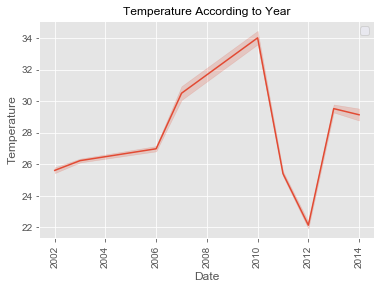

In [203]:
from matplotlib import style
fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))
style.use('ggplot')
sns.lineplot(x=data["Year"], y=sd1["Temperature"], data=sd1)
sns.set(rc={'figure.figsize':(15,6)})

plt.title("Temperature in Year 2004")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.grid(True)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)
    
    plt.title("Temperature According to Year")

In [158]:
sd1.columns

Index(['Temperature', 'Datetime'], dtype='object')

In [159]:
data=sd1
data["Month"]=pd.to_datetime(sd1["Datetime"]).dt.month
data["Year"] = pd.to_datetime(sd1["Datetime"]).dt.year
data["Date"] = pd.to_datetime(sd1["Datetime"]).dt.date
data["Time"] = pd.to_datetime(sd1["Datetime"]).dt.time
data["Week"] = pd.to_datetime(sd1["Datetime"]).dt.week
data["Day"] = pd.to_datetime(sd1["Datetime"]).dt.day_name()
data = sd1.set_index("Datetime")
data.index = pd.to_datetime(data.index)
data.head(5)

,Temperature,Month,Year,Date,Time,Week,Day
Datetime,,,,,,,
2012-01-01 00:30:00,21.449194,1,2012,2012-01-01,00:30:00,52,Sunday
2012-01-01 01:30:00,21.174410,1,2012,2012-01-01,01:30:00,52,Sunday
2012-01-01 02:30:00,20.841860,1,2012,2012-01-01,02:30:00,52,Sunday
2012-01-01 03:30:00,20.361494,1,2012,2012-01-01,03:30:00,52,Sunday
2012-01-01 04:30:00,19.889306,1,2012,2012-01-01,04:30:00,52,Sunday


In [ ]:
data.drop

In [160]:
# How many Unique Year do we Have in Dataset 
print(sd1.Year.unique(),"\n")
print("Total Number of Unique Year", sd1.Year.nunique(), "\n")

[2012 2014 2007 2010 2013 2006 2011 2003 2002] 

Total Number of Unique Year 9 



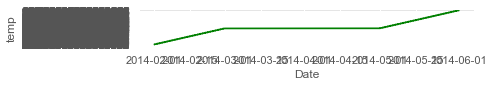

In [257]:
from matplotlib import style

fig = plt.figure()
ax1= fig.add_subplot(511)
plt.xlabel("Date")
plt.ylabel("temp")
style.use('ggplot')
y_2004 = data["2014"]["Temperature"].to_list()
x_2004 = data["2014"]["Date"].to_list()
ax1.plot(x_2004,y_2004, color="green", linewidth=1.7)



No handles with labels found to put in legend.


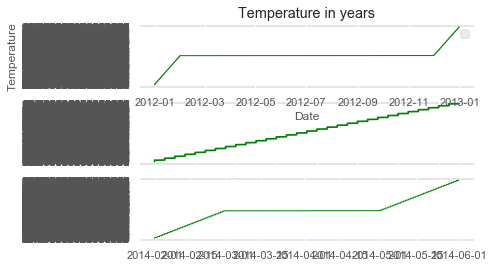

In [258]:
from matplotlib import style


fig = plt.figure()

ax1= fig.add_subplot(312)
ax2= fig.add_subplot(313)
ax3= fig.add_subplot(311)


style.use('ggplot')

y_2013 = data["2013"]["Temperature"].to_list()
x_2013 = data["2013"]["Date"].to_list()
ax1.plot(x_2013,y_2013, color="green", linewidth=1.7)


y_2014 = data["2014"]["Temperature"].to_list()
x_2014 = data["2014"]["Date"].to_list()
ax2.plot(x_2014, y_2014, color="green", linewidth=1)


y_2016 = data["2012"]["Temperature"].to_list()
x_2016 = data["2012"]["Date"].to_list()
ax3.plot(x_2016, y_2016, color="green", linewidth=1)


plt.rcParams["figure.figsize"] = (26,10)
plt.title("Temperature in years")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

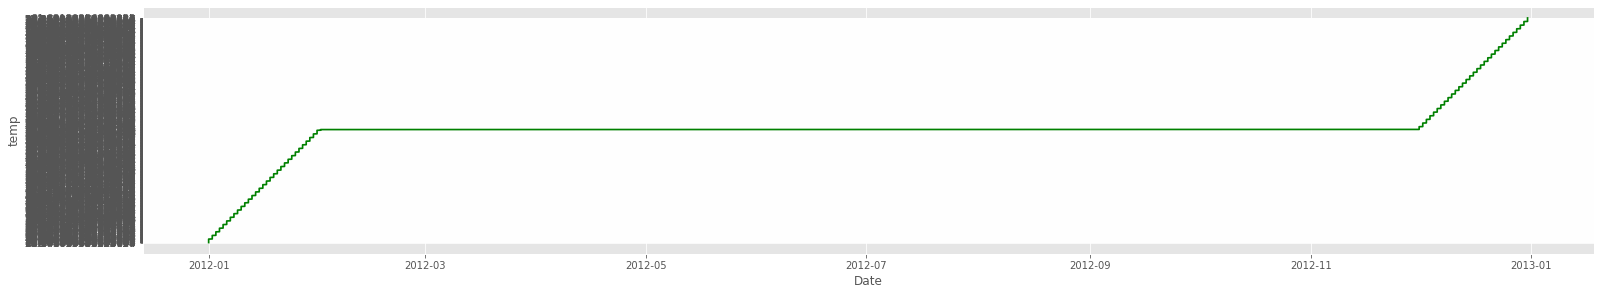

In [36]:
from matplotlib import style

fig = plt.figure()
ax1= fig.add_subplot(211)
plt.xlabel("Date")
plt.ylabel("temp")
style.use('ggplot')
y_2012 = data["2012"]["Temperature"].to_list()
x_2012 = data["2012"]["Date"].to_list()
ax1.plot(x_2012,y_2012, color="green", linewidth=1.7)


No handles with labels found to put in legend.


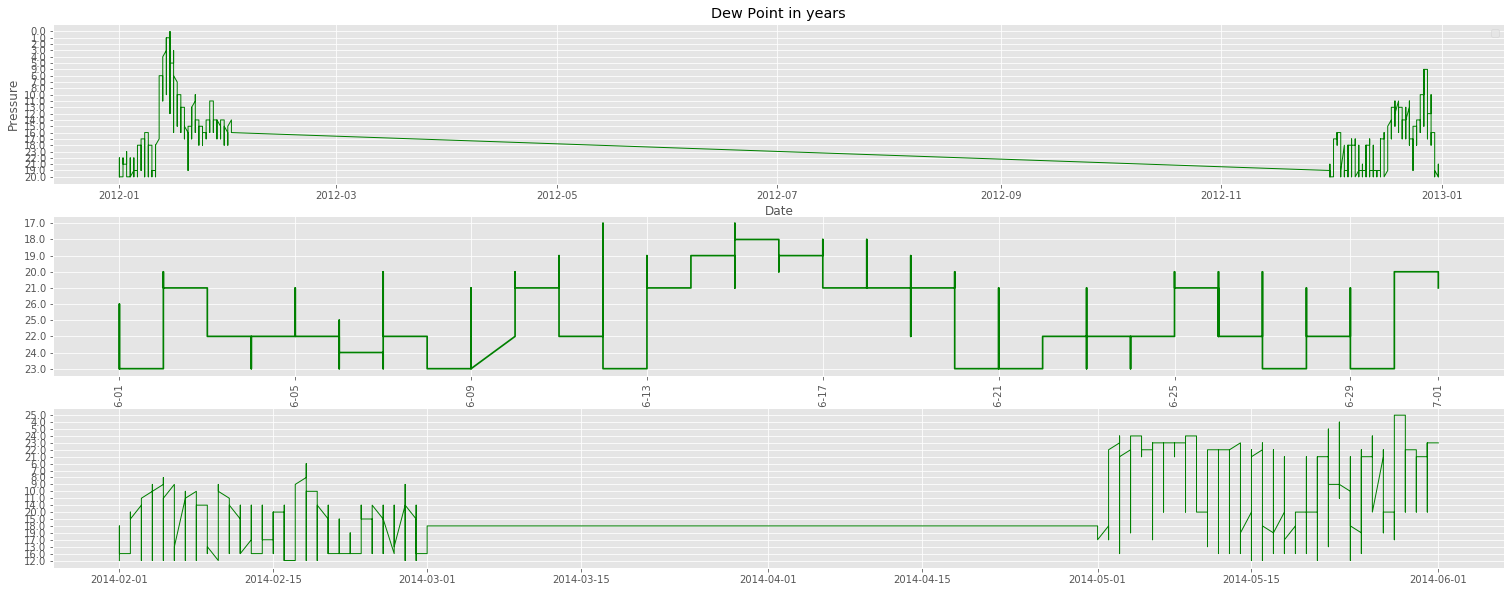

In [38]:
from matplotlib import style


fig = plt.figure()

ax1= fig.add_subplot(312)
ax2= fig.add_subplot(313)
ax3= fig.add_subplot(311)


style.use('ggplot')

y_2013 = data["2013"]["Dew Point"].to_list()
x_2013 = data["2013"]["Date"].to_list()
ax1.plot(x_2013,y_2013, color="green", linewidth=1.7)


y_2014 = data["2014"]["Dew Point"].to_list()
x_2014 = data["2014"]["Date"].to_list()
ax2.plot(x_2014, y_2014, color="green", linewidth=1)


y_2016 = data["2012"]["Dew Point"].to_list()
x_2016 = data["2012"]["Date"].to_list()
ax3.plot(x_2016, y_2016, color="green", linewidth=1)


plt.rcParams["figure.figsize"] = (26,10)
plt.title("Dew Point in years")
plt.xlabel("Date")
plt.ylabel("Pressure")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

No handles with labels found to put in legend.


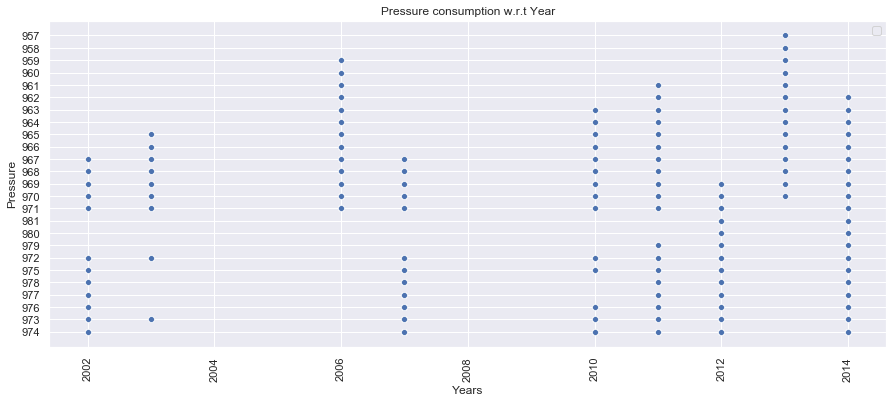

In [68]:
from matplotlib import style
fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))
style.use('ggplot')
sns.scatterplot(x=data["Year"], y=data["Pressure"], data=sd1)
sns.set(rc={'figure.figsize':(15,6)})

plt.title("Pressure data w.r.t years")
plt.xlabel("Years")
plt.ylabel("Pressure")
plt.grid(True)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)
    
    plt.title("Pressure consumption w.r.t Year")

Text(0.5, 1.0, 'Ennergy Distribution')

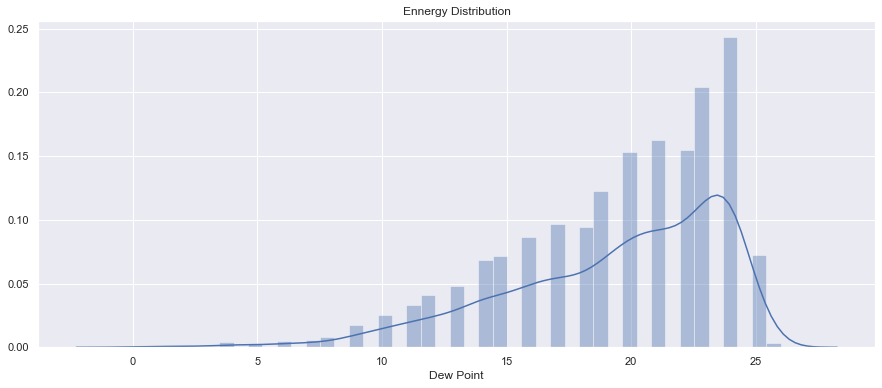

In [40]:
sns.distplot(data["Dew Point"])       #Dewpoints distribution
plt.title("Ennergy Distribution")

Text(0.5, 1.0, 'Ennergy Distribution')

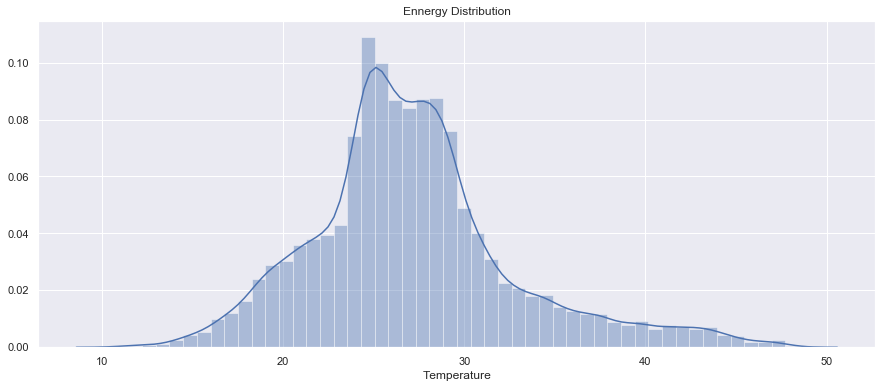

In [41]:
sns.distplot(data["Temperature"])       #Temperature distribution
plt.title("Ennergy Distribution")

Text(0.5, 1.0, 'Ennergy Distribution')

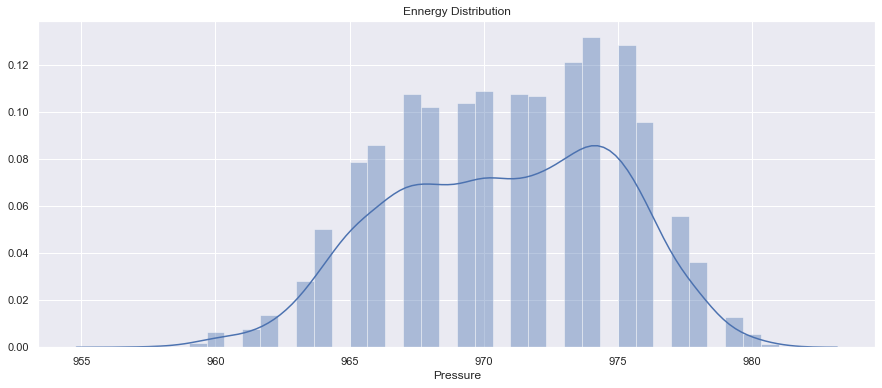

In [42]:
sns.distplot(data["Pressure"])       #Pressure distribution
plt.title("Ennergy Distribution")

In [161]:
print("Old Dataset ",sd1.shape )

Old Dataset  (8760, 8)


In [162]:
print(sd1)

      Temperature            Datetime  Month  Year        Date      Time  \
0       21.449194 2012-01-01 00:30:00      1  2012  2012-01-01  00:30:00   
1       21.174410 2012-01-01 01:30:00      1  2012  2012-01-01  01:30:00   
2       20.841860 2012-01-01 02:30:00      1  2012  2012-01-01  02:30:00   
3       20.361494 2012-01-01 03:30:00      1  2012  2012-01-01  03:30:00   
4       19.889306 2012-01-01 04:30:00      1  2012  2012-01-01  04:30:00   
...           ...                 ...    ...   ...         ...       ...   
8755    23.352176 2012-12-31 19:30:00     12  2012  2012-12-31  19:30:00   
8756    22.889635 2012-12-31 20:30:00     12  2012  2012-12-31  20:30:00   
8757    22.499709 2012-12-31 21:30:00     12  2012  2012-12-31  21:30:00   
8758    22.173667 2012-12-31 22:30:00     12  2012  2012-12-31  22:30:00   
8759    21.831394 2012-12-31 23:30:00     12  2012  2012-12-31  23:30:00   

      Week     Day  
0       52  Sunday  
1       52  Sunday  
2       52  Sunday  
3  

In [163]:
sd1.columns

Index(['Temperature', 'Datetime', 'Month', 'Year', 'Date', 'Time', 'Week',
       'Day'],
      dtype='object')

In [164]:
sd1=sd1.drop(columns=['Date','Time','Day'])

In [165]:
sd1=sd1.set_index('Datetime')

In [166]:
NewDataSet = sd1.resample('D',).mean()

In [167]:
NewDataSet.head()

,Temperature,Month,Year,Week
Datetime,,,,
2002-10-01,26.817624,10.0,2002.0,40.0
2002-10-02,26.412232,10.0,2002.0,40.0
2002-10-03,26.412725,10.0,2002.0,40.0
2002-10-04,26.468332,10.0,2002.0,40.0
2002-10-05,26.285986,10.0,2002.0,40.0


In [168]:
print("Old Dataset ",data.shape )
print("New Dataset ",NewDataSet.shape )

Old Dataset  (8760, 7)
New Dataset  (4262, 4)


## Modified

In [169]:
TestData = data.tail(400)

Training_Set = data.iloc[:,0:1]
Training_Set = Training_Set[:-400]

In [170]:
Training_Set.head()

,Temperature
Datetime,
2012-01-01 00:30:00,21.449194
2012-01-01 01:30:00,21.174410
2012-01-01 02:30:00,20.841860
2012-01-01 03:30:00,20.361494
2012-01-01 04:30:00,19.889306


In [171]:
print("Test Set Shape ", TestData.shape)
print("Training Set Shape ", Training_Set.shape)


Test Set Shape  (400, 7)
Training Set Shape  (8360, 1)


In [172]:
from sklearn.preprocessing import MinMaxScaler

In [173]:
Training_Set = Training_Set
sc = MinMaxScaler(feature_range=(0,1))
Train = sc.fit_transform(Training_Set)

In [174]:
print(Train)

[[0.2842941 ]
 [0.27701774]
 [0.26821172]
 ...
 [0.21123806]
 [0.20727891]
 [0.22714656]]


In [175]:
Training_Set.head(2)

,Temperature
Datetime,
2012-01-01 00:30:00,21.449194
2012-01-01 01:30:00,21.174410


In [176]:
X_Train = []
Y_Train = []

# Range should be fromm 70 Values to END 
for i in range(70, Train.shape[0]):
    
    # X_Train 0-69 
    X_Train.append(Train[i-70:i])
    
    # Y Would be 70 th Value based on past 70 Values 
    Y_Train.append(Train[i])

# Convert into Numpy Array
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

print(X_Train.shape)
print(Y_Train.shape)

(8290, 70, 1)
(8290, 1)


In [178]:
# Shape should be Number of [Datapoints , Steps , 1 )
# we convert into 3-d Vector or #rd Dimesnsion
X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1], 1))
X_Train.shape

(8290, 70, 1)

In [179]:
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_Train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 5, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 5, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 5, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 5, return_sequences = True))
regressor.add(Dropout(0.2))


# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 5, return_sequences = True))
regressor.add(Dropout(0.2))



# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 5))
regressor.add(Dropout(0.2))

# Adding the output 
regressor.add(Dense(units = 2))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [180]:
regressor.fit(X_Train, Y_Train, epochs = 2, batch_size = 10)

Epoch 1/2
829/829 [==============================] - 125s 151ms/step - loss: 0.0239
Epoch 2/2
829/829 [==============================] - 124s 150ms/step - loss: 0.0069


In [181]:
TestData.head(2)

,Temperature,Month,Year,Date,Time,Week,Day
Datetime,,,,,,,
2012-12-15 08:30:00,20.726548,12,2012,2012-12-15,08:30:00,50,Saturday
2012-12-15 09:30:00,23.081047,12,2012,2012-12-15,09:30:00,50,Saturday


In [182]:
NewDataSet.shape

(4262, 4)

In [184]:
Df_Total = pd.concat((NewDataSet[["Temperature"]],
                      TestData[["Temperature"]]), axis=0)

In [185]:
Df_Total.shape

(4662, 1)

In [188]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 70:].values
inputs.shape

(470, 1)

In [189]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 70:].values

# We need to Reshape
inputs = inputs.reshape(-1,1)

# Normalize the Dataset
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 460):
    X_test.append(inputs[i-60:i])
    
# Convert into Numpy Array
X_test = np.array(X_test)

# Reshape before Passing to Network
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Pass to Model 
predicted_Temperature = regressor.predict(X_test)

# Do inverse Transformation to get Values 
predicted_Temperature = sc.inverse_transform(predicted_Temperature)

In [190]:
True_Temperature = TestData["Temperature"].to_list()
Predicted_Temperature  = predicted_Temperature
dates = TestData.index.to_list()

In [191]:
Machine_Df = pd.DataFrame(data={"Date":dates,"TrueTemperature": True_Temperature,
                                "PredictedTemperature":[x[0] for x in Predicted_Temperature]
                               })

In [195]:
Machine_Df.tail(20)

,Date,TrueTemperature,PredictedTemperature
380,2012-12-31 04:30:00,20.065229,23.322947
381,2012-12-31 05:30:00,20.020067,22.326319
382,2012-12-31 06:30:00,20.107982,21.421196
383,2012-12-31 07:30:00,21.146930,20.658270
384,2012-12-31 08:30:00,23.286078,20.084562
385,2012-12-31 09:30:00,25.344006,19.717243
386,2012-12-31 10:30:00,26.968634,19.576700
387,2012-12-31 11:30:00,27.915914,19.683729
388,2012-12-31 12:30:00,28.313236,20.044136
389,2012-12-31 13:30:00,28.097669,20.642136


In [197]:
print(len(dates),len(True_Temperature),len(X_test))

400 400 400


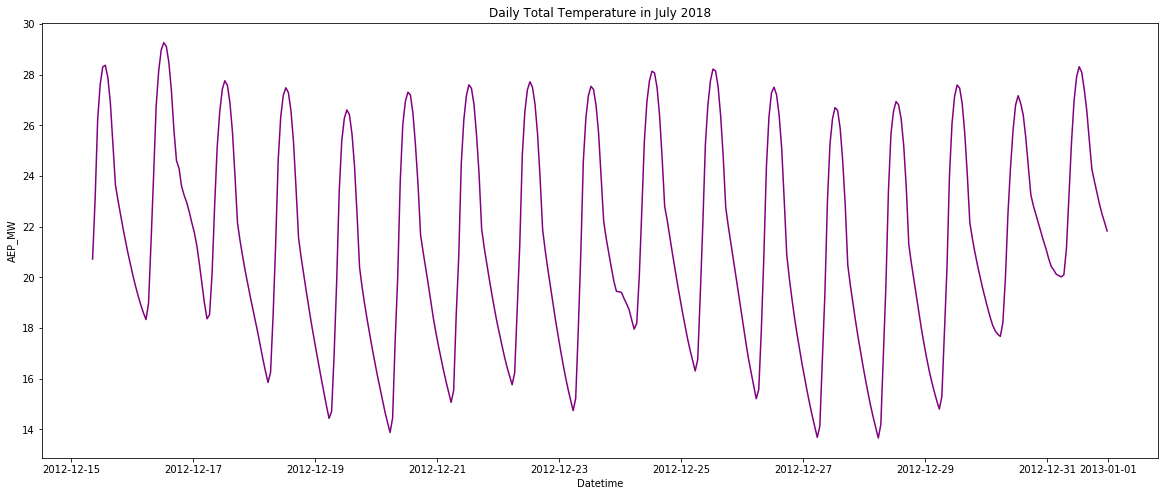

In [201]:
fig, ax = plt.subplots(figsize=(20, 8))

# Add x-axis and y-axis
ax.plot(Machine_Df['Date'],
        Machine_Df['TrueTemperature'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Datetime",
       ylabel="AEP_MW",
       title="Daily Total Temperature in July 2018")

plt.show()

In [233]:
from datetime import datetime

In [225]:
dateTimeObj = datetime.now()

In [227]:
dateTimeObj

datetime.datetime(2020, 7, 2, 2, 9, 57, 133051)

In [226]:
timestampStr = dateTimeObj.strftime("%d-%b-%Y (%H:%M:%S.%f)")

In [228]:
timestampStr

'02-Jul-2020 (02:09:57.133051)'